In [298]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [299]:
import numpy as np

In [300]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(15.7,8.27)})

In [301]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

In [302]:
df = pd.read_csv('../data/re_entry.csv')

## Lets see our input data

In [303]:
df.T.head(33)

,0,1,2,3,4,5,6,7,8,9,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
Case-Id,25,37,38,73,80,81,82,83,84,85,...,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049
sorting,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
timestamp,2015-02-25 09:06:20,2013-12-26 06:50:57,2014-11-20 11:11:27,2014-07-20 10:27:47,2015-02-07 14:14:13,2015-02-22 23:50:05,2014-03-08 02:44:37,2014-02-27 07:58:20,2014-03-11 12:36:01,2014-08-25 04:18:21,...,2014-09-06 13:22:52,2014-09-19 06:14:18,2014-11-10 03:25:25,2014-11-20 08:25:52,2014-09-08 18:49:40,2014-07-30 22:25:29,2014-08-01 08:26:51,2014-11-03 08:43:47,2014-11-12 16:40:19,2014-12-11 22:28:38
age,75,55,85,90,80,75,45,85,80,85,...,30,65,85,80,80,55,75,25,40,35
org:group,A,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
diagnose,NaN,O,NaN,NaN,NaN,E,BA,B,S,S,...,Z,BA,NaN,NaN,PE,G,G,NaN,NaN,QE
diagnosticartastrup,0,0,0,1,0,0,1,0,0,1,...,1,0,0,1,1,0,1,0,0,1
diagnosticblood,1,1,0,1,0,1,1,1,0,1,...,0,0,0,1,1,1,1,0,0,1
diagnosticecg,1,1,0,1,0,1,1,1,0,1,...,1,0,1,1,1,1,1,0,0,1
diagnosticic,1,1,0,1,0,1,1,1,0,1,...,1,0,1,1,1,1,1,0,0,1


# Feature Engineering

In [304]:
date = pd.to_datetime(df['timestamp'])
df['year'] = date.apply(lambda x: x.year)
df['month'] = date.apply(lambda x: x.month)
df['day'] = date.apply(lambda x: x.day)
df['day_week'] = date.apply(lambda x: x.dayofweek)

In [305]:
objects_col = []
for c in df.columns:
        if df[c].dtype == 'object':
            objects_col.append(c)
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(list(df[c].values))

In [306]:
drop_cols = ['target','sorting', 'timestamp', 'infusion', 'Case-Id']
X = df.drop(drop_cols, axis=1)
X = X.fillna('A')
#X = data.drop('Case-Id', axis=1)
y = df['target']

# Machine Leaning

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.20)

In [308]:
clf = RandomForestClassifier(n_estimators=40,max_depth=5,  min_samples_leaf=3, n_jobs=-1, oob_score=True, class_weight='balanced')
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [309]:
feature_importance = clf.feature_importances_
importance_list = []
for k,v in zip(x_train.columns, feature_importance):
    importance_list.append((k,v))

In [310]:
importance_list = sorted(importance_list, key=lambda x : x[1], reverse=True)
importance_list

[('diagnose', 0.3817460309038776),
 ('day', 0.10402324630725183),
 ('age', 0.10295552495730406),
 ('month', 0.062818842653312043),
 ('sirscrittachypnea', 0.060253371216996518),
 ('diagnosticecg', 0.049448090735610545),
 ('day_week', 0.039818822983804639),
 ('diagnosticxthorax', 0.029063208743924727),
 ('year', 0.022607817331422374),
 ('diagnosticlacticacid', 0.017537918854454642),
 ('infectionsuspected', 0.016855701155524951),
 ('sirscrittemperature', 0.014684918443152752),
 ('diagnosticurinaryculture', 0.011727360733309626),
 ('diagnosticblood', 0.011081064834275227),
 ('sirscritleucos', 0.010158171696324334),
 ('diagnosticsputum', 0.010004587040051473),
 ('diagnosticartastrup', 0.0097481306239777712),
 ('diagnosticurinarysediment', 0.0093730144784065998),
 ('diagnosticic', 0.0093403313584889298),
 ('sirscritheartrate', 0.0090695802969731551),
 ('org:group', 0.0081971580474934514),
 ('disfuncorg', 0.0047593394216057508),
 ('hypotensie', 0.0023555111061561796),
 ('oligurie', 0.00195176

In [280]:
top_n = 15
imp_var = [k for k, _ in importance_list][0:top_n]
val = [k for _, k in importance_list][0:top_n]
#plt.title('Feature Importances')
#plt.yticks(range(top_n), imp_var[0:top_n])
#plt.xlabel('Relative Importance')
#plt.barh(range(top_n), val[0:top_n], color='r', align='center')
#plt.show()

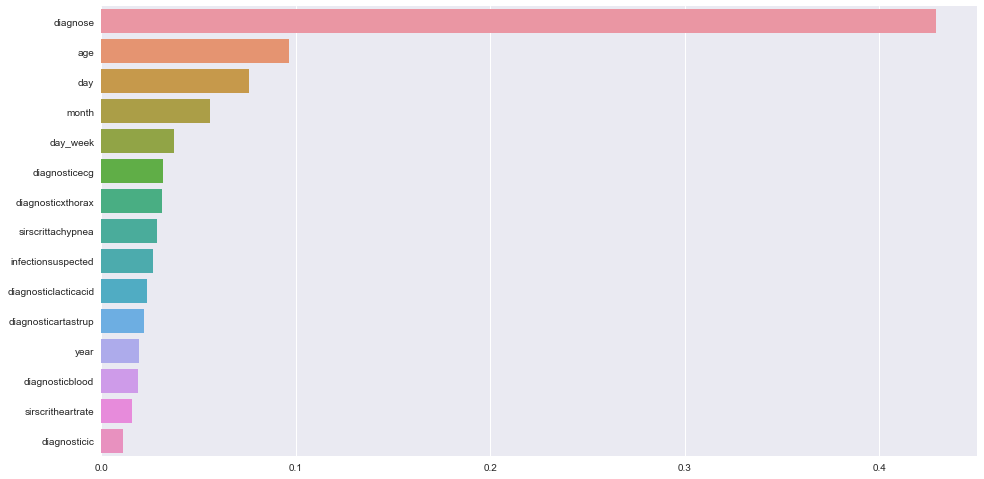

In [281]:
sns.barplot(x=val, y=imp_var)

In [282]:
yhat_train = clf.predict(x_train)
yhat_val = clf.predict(x_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, yhat_train)

0.68095238095238098

In [283]:
accuracy_score(y_val, yhat_val)

0.60476190476190472

# Modelling

In [287]:
import_cols = ['diagnose', 'age', 'day', 'diagnosticxthorax']

In [288]:
X = df[import_cols]
y = df['target']

In [289]:
X.head()

,diagnose,age,day,diagnosticxthorax
0,142,75,25,1.0
1,80,55,26,1.0
2,142,85,20,0.0
3,142,90,20,1.0
4,142,80,7,0.0


In [290]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.20)

In [291]:
clf = RandomForestClassifier(n_estimators=40,max_depth=5,  min_samples_leaf=3, n_jobs=-1, oob_score=True, class_weight='balanced')
clf.fit(x_train, y_train)
feature_importance = clf.feature_importances_
importance_list = []
for k,v in zip(x_train.columns, feature_importance):
    importance_list.append((k,v))

In [292]:
importance_list = sorted(importance_list, key=lambda x : x[1], reverse=True)
importance_list

[('diagnose', 0.56884442854646622),
 ('day', 0.20431784779956103),
 ('age', 0.15492524495332019),
 ('diagnosticxthorax', 0.071912478700652621)]

In [293]:
yhat_train = clf.predict(x_train)
yhat_val = clf.predict(x_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, yhat_train)

0.68452380952380953

In [294]:
accuracy_score(y_val, yhat_val)

0.60952380952380958